# Police Stops in Massachusetts
Visualizing racial disparities in police stops by Massachusetts State Police

In [2]:
# Load Data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [3]:
df = pd.read_csv("ma_statewide_2020_04_01.csv")
print(df.shape)
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3416238, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


In [4]:
# Filter rows that don't have race data 
df = df[df["subject_race"].notnull()]
print(df.shape)
df.head()

(3414574, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


We only removed 1,664 records. 

In [5]:
# Racial breakdown of traffic stops
racial_breakdown = df.groupby('subject_race')['raw_row_number'].nunique()

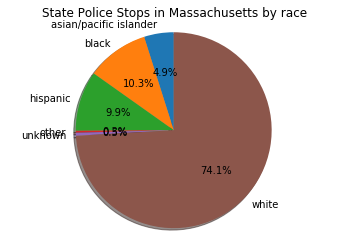

In [6]:
labels = []
sizes = []

for race, stops in racial_breakdown.items():
    labels.append(race)
    sizes.append(stops)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("State Police Stops in Massachusetts by race")
plt.show()

Massachusetts in 2018 was about 12.3% Hispanic, 80% White (71.4% non-Hispanic White), 8.9% Black, 7.2% AAPI, and 3% other. (These don't add up to 100% because Hispanic is not considered a race by the Census). Overall, police stops in Massachusetts are roughly inline with proportions of Census categories, though there could be discrepancies due to how police perceive the people they stop.

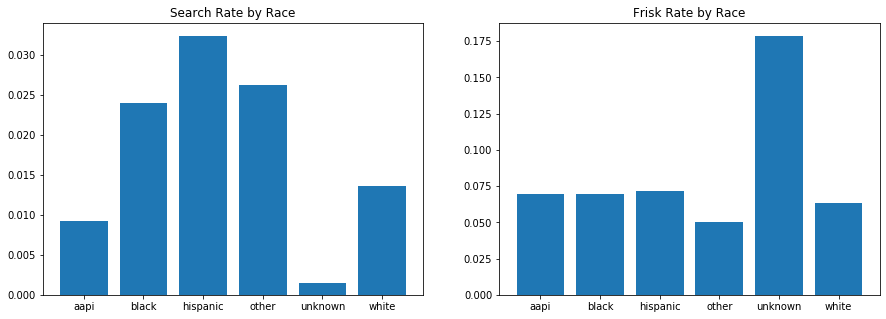

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

# Search rate, by race
search_by_race = df.groupby(['subject_race', 'search_conducted'])['raw_row_number'].nunique()

labels = ["aapi", "black", "hispanic", "other", "unknown", "white"]
search_rate = []

for i in range(0, 2 * len(labels), 2):
    search_rate.append(search_by_race[i + 1] / (search_by_race[i] + search_by_race[i + 1]))

ax1.bar(labels, search_rate)
ax1.set_title('Search Rate by Race')

# Frisk rate, by race
frisk_by_race = df.groupby(['subject_race', 'frisk_performed'])['raw_row_number'].nunique()
frisk_rate = []

for i in range(0, 2 * len(labels), 2):
    frisk_rate.append(frisk_by_race[i + 1] / (frisk_by_race[i] + frisk_by_race[i + 1]))

ax2.bar(labels, frisk_rate)
ax2.set_title('Frisk Rate by Race')

plt.show()

As can be seen, Black and Hispanic people are disproportionately searched by race, and POC generally are frisked at slightly higher rates than white people, though this is not a significant enough difference, and there aren't as many data points for frisking. (Ignore other & unknown, data is not enough)

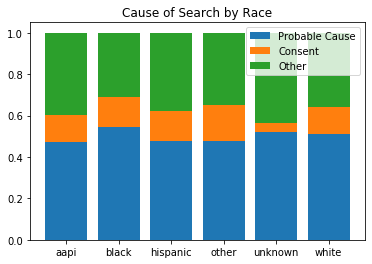

In [8]:
# Search basis, by race
search_basis_by_race = df.groupby(['subject_race', 'search_basis'])['raw_row_number'].nunique()
probable_cause_by_race = []
consent_cause_by_race = []
other_cause_by_race = []

for i in range(0, 3 * len(labels), 3):
    total = (search_basis_by_race[i] + search_basis_by_race[i + 1] + search_basis_by_race[i + 2])
    consent_cause_by_race.append(search_basis_by_race[i] / total)
    other_cause_by_race.append(search_basis_by_race[i + 1] / total)
    probable_cause_by_race.append(search_basis_by_race[i + 2] / total)
    
ind = np.arange(len(labels))   
p1 = plt.bar(ind, probable_cause_by_race)
p2 = plt.bar(ind, consent_cause_by_race, bottom=probable_cause_by_race)
p3 = plt.bar(ind, other_cause_by_race, bottom=list(map(add, probable_cause_by_race, consent_cause_by_race)))

plt.xticks(ind, labels)
plt.title('Cause of Search by Race')
plt.legend((p1[0], p2[0], p3[0]), ('Probable Cause', 'Consent', 'Other'))

plt.show()

There doesn't seem to be that much variation in why police search, with the exception that "probable cause" is a more common reason when searching African Americans.  

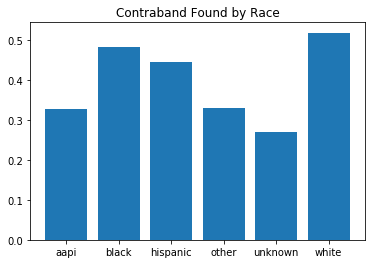

In [9]:
# Outcome test 
contraband_found_by_race = df.groupby(['subject_race', 'contraband_found'])['raw_row_number'].nunique()
contraband_rate = []

for i in range(0, 2 * len(labels), 2):
    contraband_rate.append(contraband_found_by_race[i + 1] / (contraband_found_by_race[i] + contraband_found_by_race[i + 1]))
    
plt.bar(labels, contraband_rate)
plt.title('Contraband Found by Race')
plt.show()

As can be seen, contraband is actually found in lower rates amongst Black and Hispanic people who are searched, despite the fact that Black and Hispanic people are more likely to be searched when stopped. This suggests some discriminatory policing. However, this is an imperfect measure. According to [Stanford Open Policing Project](https://openpolicing.stanford.edu/findings/):

"Becker’s outcome test is a compelling measure of discrimination. But it’s also an imperfect barometer of bias. The test can fail to detect discrimination when it’s there and can indicate discrimination when it’s not there, as we and other researchers have observed.

For example, say police officers have a small universe of types of drivers they stop. In fact, suppose there are just two types of white drivers: some of the white drivers have a 5% likelihood of carrying contraband, and the others have a 75% chance of carrying contraband. Suppose there are also just two types of black drivers: some black drivers have a 5% chance of carrying contraband, and the others have a 50% chance of carrying contraband.

In this hypothetical world, consider a fair police officer who only searches drivers with at least a 10% chance of carrying something illegal — regardless of race. In that situation, the white hit rate would be 75% and the black hit rate would be 50%. The officer used the same standard to search each driver, and so did not discriminate, even though the hit rates differ." 

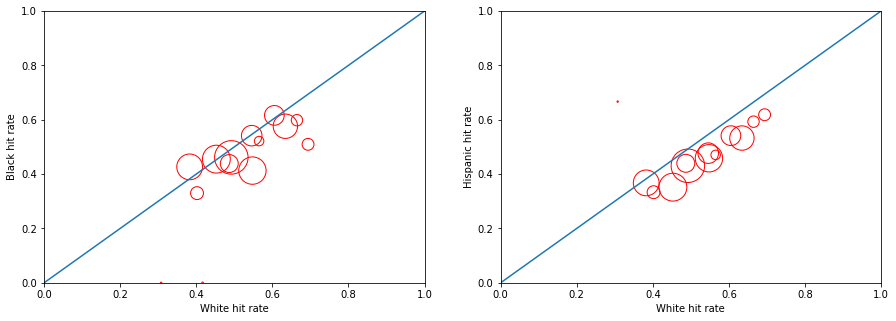

In [70]:
# Outcome test, by county 
contraband_found_by_county = list(df.pivot_table(index='contraband_found', 
                     columns=['county_name', 'subject_race'], 
                     values='raw_row_number',
                     fill_value=0, 
                     aggfunc='count').unstack().iteritems())

county_hit_rates = {}

for i in range(0, len(contraband_found_by_county), 2):
    (county, race, contraband_found), count = contraband_found_by_county[i]
    
    if county not in county_hit_rates: county_hit_rates[county] = {
        "white": None,
        "black": None,
        "asian/pacific islander": None,
        "other": None,
        "hispanic": None,
        "hits": 0
    }
        
    hit_rate = contraband_found_by_county[i + 1][1] / (contraband_found_by_county[i][1] + contraband_found_by_county[i + 1][1])
    county_hit_rates[county][race] = hit_rate
    county_hit_rates[county]["hits"] += contraband_found_by_county[i][1] + contraband_found_by_county[i + 1][1]
    
white_hit_rates = []
black_hit_rates = []
hispanic_hit_rates = []
hits = []
    
for county, rates in county_hit_rates.items():
    white_hit_rates.append(rates["white"])
    black_hit_rates.append(rates["black"])
    hispanic_hit_rates.append(rates["hispanic"])
    hits.append(rates["hits"])
    
s = [n/10 for n in hits]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.scatter(white_hit_rates, black_hit_rates, facecolors='none', edgecolors='r', s = s)
ax1.set_xlabel("White hit rate")
ax1.set_ylabel("Black hit rate")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.plot([0, 1], [0, 1])

ax2.scatter(white_hit_rates, hispanic_hit_rates, facecolors='none', edgecolors='r', s= s)                       
ax2.set_xlabel("White hit rate")
ax2.set_ylabel("Hispanic hit rate")
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.plot([0, 1], [0, 1])


plt.show()

Plotting hit rates by race, where each dot is a county, scaled by the number of hits (AAPI hit rate data is not included, because numbers are too small). As can be seen, hit rates are consistently lower amongst minority drivers in most counties, suggesting discrimination. 

In [14]:
df.pivot_table(index='subject_race', 
                     columns=['contraband_found', 'arrest_made', 'citation_issued', 'warning_issued'], 
                     values='raw_row_number',
                     fill_value=0, 
                     aggfunc='count').unstack()

# When contraband is found, are minority drivers punished harsher? 
# Map by county and location, stop rates vs population rates

contraband_found  arrest_made  citation_issued  warning_issued  subject_race          
False             False        False            False           asian/pacific islander       0
                                                                black                       13
                                                                hispanic                    21
                                                                other                        1
                                                                unknown                      0
                                                                white                       50
                                                True            asian/pacific islander     244
                                                                black                      996
                                                                hispanic                  1161
                                                          